In [1]:
from __future__ import unicode_literals
import sys
reload(sys)
sys.setdefaultencoding('utf-8')

#for team dataset
import json
import os
import time

In [2]:
posts = {}
pois = {}
users = {}

In [3]:
#make
f = open('data.txt', 'r')
dic = {}
t = f.read()
lists_all = t.split('\n')

for line in lists_all:
# [0] user_id 
# [1] latitude 
# [2] longitude 
# [3] created time 
# [4] poi
# [5] content
    lists = line.split('\t')
    if(pois.get(lists[4]) == None):
        pois[lists[4]] = {}
        pois[lists[4]]['name'] = lists[4]
        pois[lists[4]]['gps'] = (lists[1], lists[2])
        pois[lists[4]]['users'] = {}
        pois[lists[4]]['users'][lists[0]] = 1
    else:
        pois[lists[4]]['users'][lists[0]] = 1

f.close()

In [4]:
f = open('data.txt', 'r')
dic = {}
t = f.read()
lists_all = t.split('\n')
users = {}
for line in lists_all:
# [0] user_id 
# [1] latitude 
# [2] longitude 
# [3] created time 
# [4] poi
# [5] content
    lists = line.split('\t')
    if(users.get(lists[0]) == None):
#         dic = {}
#         dic['gps'] = (lists[1], lists[2])
#         dic['created_time'] = int(lists[3][0:4])*10000 + int(lists[3][5:7])*100 + int(lists[3][8:10])
        users[lists[0]] = {}
        users[lists[0]][lists[3]] = (lists[1], lists[2])
        
    else:
#         dic = {}
#         dic['gps'] = (lists[1], lists[2])
#         dic['created_time'] = int(lists[3][0:4])*10000 + int(lists[3][5:7])*100 + int(lists[3][8:10])
        users[lists[0]][lists[3]] = (lists[1], lists[2])

f.close()

In [7]:
import datetime

hour_cnt = {}

for i in range(0,24):
    hour_cnt[i] = {}
    for j in range(0,7):
        hour_cnt[i][j] = 0

        
for user in users.keys():
    for key in users[user].keys():
        year = int(key[0:4])
        month = int(key[5:7])
        day = int(key[8:10])
        w = datetime.date(year, month, day).weekday()

        hour = int(key[11:13])
        if hour>12:
            hour = (hour-13) % 24
        else:
            hour = (hour+11) % 24
            w = (w+6) % 7
        
        hour_cnt[hour][w] += 1
day = []
for i in range(0,24):
    day.append(str(i))
    
Mon = []
Tue = []
Wed = []
Thu = []
Fri = []
Sat = []
Sun = []

for i in range(0,24):
    Mon.append(hour_cnt[i][0])
    Tue.append(hour_cnt[i][1])
    Wed.append(hour_cnt[i][2])
    Thu.append(hour_cnt[i][3])
    Fri.append(hour_cnt[i][4])
    Sat.append(hour_cnt[i][5])
    Sun.append(hour_cnt[i][6])

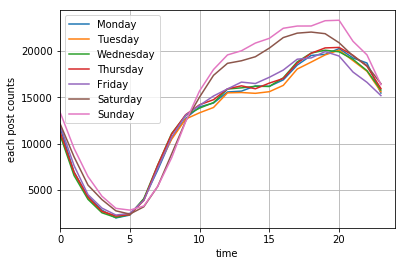

In [8]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(day, Mon,label='Monday')
plt.plot(day, Tue,label='Tuesday')
plt.plot(day, Wed,label='Wednesday')
plt.plot(day, Thu,label='Thursday')
plt.plot(day, Fri,label='Friday')
plt.plot(day, Sat,label='Saturday')
plt.plot(day, Sun,label='Sunday')

plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('each post counts')
plt.xlim(0,24)
plt.show()